# Task: Regression on the tabular data


You have a dataset (`internship_train.csv`) that contains **53 anonymized features and a target column**. Your task is to build model that predicts a target based on the proposed features. Please provide predictions for `internship_hidden_test.csv` file. Target metric is **RMSE**. The main goal is to provide **github repository** that contains:
* jupyter notebook with analysis; 
* code for modeling (Python 3); 
* file with model predictions; 
* readme file;
* requirements.txt file.

# 1. Upload Data

## 1.1 Libraries

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

pd.pandas.set_option('display.max_columns', None)
sklearn.utils.check_random_state(1)

RandomState(MT19937) at 0x7F4D1DAE9940

In [2]:
# working dir is where file located
os.chdir(os.path.dirname(os.path.abspath('__file__')))
os.getcwd()

'/mnt/DATA/diakap/Quantum_Test/Linear_Regression_Task'

In [3]:
# find test and train files
for root, dirs, files  in os.walk(os.getcwd()):
    for f in files:
        if 'train' in f:
            PATH_TRAIN = os.path.abspath(os.path.abspath(root + '/' + f))
        elif 'hidden_test' in f:
            PATH_TEST = os.path.abspath(os.path.abspath(root + '/' + f))

## 1.2 Upload Train/Val Data

In [4]:
# load data
dataset = pd.read_csv(PATH_TRAIN)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


According to analysis in 3.1 notebook we have 2 features that correlated between each other, so in future we try several combination with it to check model performance

## 1.3 Preprocessing
In this example use MinMaxScaler

In [5]:
dataset_columns = list(dataset.columns)
scaler = MinMaxScaler()

In [6]:
# For transformation all columns ok. We scale target value also.
scaling_feature = dataset_columns
dataset_scaling = scaler.fit_transform(dataset[scaling_feature])
dataset_scaling = pd.DataFrame(dataset_scaling)
dataset_scaling.columns = dataset_columns

# 2. Modeling All Features: Sklearn LinearRegression() 

**Cross Validation**

Use this method, because if we use `train_test_split()` this means our program *sees* our test data, that not good for idea of hidden test data

In [7]:
# Split Data on X and y
X_data = dataset_scaling.loc[:, dataset_scaling.columns!='target']
y_data = dataset_scaling['target'].to_numpy()

In [8]:
# cross validation
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")

RMSE scores mean: 0.28908
RMSE scores: [0.29004 0.2882  0.29009 0.28758 0.28949]


In [9]:
# create dataframe for comparision all methods
result_df = pd. DataFrame({'LinearRegression':[np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]},
                         index=['RMSE_Cross_Val_5', 'Mean_RMSE'])
result_df

,LinearRegression
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]"
Mean_RMSE,0.28908


# 3. Modeling All Features: Sklearn MLPRegressor()
Use Linear Reggression with 2 hidden layers. we use cross_val for scoring

In [10]:
# Use MLPClassifier
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10, random_state=1)
rmse_scores = cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error')
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['MLPRegressor_50_relu'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE scores mean: 0.02843
RMSE scores: [0.03118 0.02748 0.03421 0.02324 0.02604]


/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
result_df

,LinearRegression,MLPRegressor_50_relu
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]"
Mean_RMSE,0.28908,0.02843


# 4. Experiment Modelling

## 4.1 Delete feature 6 
Feature 6 - that one feature, which has hole in histogram, but itself more smooth version of binary feature 8. Has bigger correlation with target, but correlation less then 0.001

In [12]:
# Let's look into dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


### 4.1.1 Preprocessing

In [13]:
# Don't want change initial dataframe, 
# so make copy of that
# and delete feature 6 from it
dataset_exp = dataset.copy()
dataset_exp.drop(columns=['6'], inplace=True)
dataset_exp_columns = list(dataset_exp.columns)
scaler = MinMaxScaler()

In [14]:
# For transformation all columns ok. We scale target value also.
scaling_feature = dataset_exp_columns
dataset_scaling = scaler.fit_transform(dataset_exp[scaling_feature])
dataset_scaling = pd.DataFrame(dataset_scaling)
dataset_scaling.columns = dataset_exp_columns

In [15]:
dataset_scaling.head()

,0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,0.472946,0.977956,0.032064,0.442886,0.765531,0.194389,0.107460,0.0,0.264529,0.563126,0.673347,0.198397,0.258670,0.119819,0.216827,0.808797,0.206089,0.375349,0.297760,0.167393,0.398846,0.302742,0.849368,0.842328,0.270017,0.788483,0.237887,0.894704,0.550113,0.152526,0.988967,0.005479,0.198367,0.348258,0.080815,0.486853,0.472212,0.240690,0.517833,0.521984,0.559685,0.105564,0.675018,0.889397,0.058035,0.130856,0.497792,0.769854,0.588197,0.603093,0.526387,0.734054,0.201055
1,0.773547,0.412826,0.715431,0.464930,0.002004,0.396794,0.763720,1.0,0.286573,0.218437,0.246493,0.260521,0.806654,0.711368,0.942495,0.014457,0.095122,0.061094,0.544560,0.028797,0.391479,0.693435,0.856224,0.501996,0.835040,0.577023,0.566643,0.373498,0.279165,0.880410,0.362177,0.825290,0.795900,0.403828,0.172082,0.785697,0.296370,0.742758,0.055976,0.098789,0.594705,0.296682,0.705671,0.832331,0.477926,0.192356,0.827626,0.684031,0.672760,0.618057,0.211601,0.928138,0.617630
2,0.859719,0.098196,0.963928,0.222445,0.222445,0.292585,0.651165,1.0,0.861723,0.977956,0.276553,0.160321,0.196495,0.844758,0.885346,0.877556,0.603460,0.773725,0.739627,0.697449,0.655194,0.147062,0.660983,0.296560,0.590996,0.722498,0.944535,0.897125,0.990378,0.506411,0.328534,0.162659,0.452744,0.580651,0.090868,0.332064,0.145488,0.978244,0.538885,0.440103,0.452605,0.865481,0.684891,0.935357,0.026330,0.544047,0.839499,0.595834,0.151013,0.750381,0.853024,0.805407,0.746509
3,0.829659,0.701403,0.963928,0.741483,0.416834,0.316633,0.424643,1.0,0.681363,0.222445,0.076152,0.354709,0.357881,0.451056,0.036283,0.478366,0.967683,0.126771,0.615429,0.640047,0.670604,0.378668,0.549225,0.018176,0.792865,0.268704,0.996461,0.474771,0.433826,0.830856,0.814838,0.021231,0.356686,0.209560,0.686123,0.873678,0.677279,0.244766,0.739148,0.085932,0.016607,0.197795,0.459022,0.185972,0.427792,0.703330,0.763788,0.431196,0.167937,0.017208,0.621202,0.358873,0.694242
4,0.637275,0.719439,0.040080,0.436874,0.635271,0.603206,0.767310,1.0,0.424850,0.282565,0.835671,0.687375,0.972820,0.432234,0.610630,0.338862,0.584805,0.512480,0.740478,0.928425,0.060930,0.094535,0.300266,0.410560,0.119386,0.469974,0.960664,0.774389,0.378372,0.609083,0.709364,0.936748,0.149356,0.218125,0.337429,0.245324,0.196572,0.427972,0.991544,0.987145,0.666166,0.246786,0.744198,0.125770,0.128002,0.151208,0.009956,0.273712,0.694422,0.454410,0.572484,0.300827,0.667668


### 4.1.2 Modeling DEL 6: Sklearn LinearRegression() 

In [16]:
# Split Data on X and y
X_data = dataset_scaling.loc[:, dataset_scaling.columns!='target']
y_data = dataset_scaling['target'].to_numpy()

In [17]:
# cross validation
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['LinearRegression_DEL_6'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

RMSE scores mean: 0.28907
RMSE scores: [0.29004 0.2882  0.29007 0.28758 0.28948]


In [18]:
result_df

,LinearRegression,MLPRegressor_50_relu,LinearRegression_DEL_6
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]","[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]"
Mean_RMSE,0.28908,0.02843,0.28907


### 4.1.3 Modeling DEL 6: Sklearn MLPRegressor()

In [19]:
# Use MLPClassifier
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10, random_state=1)
rmse_scores = cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error')
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['MLPRegressor_50_relu_DEL_6'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE scores mean: 0.29029
RMSE scores: [0.29245 0.29017 0.29039 0.28825 0.29018]


/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
result_df

,LinearRegression,MLPRegressor_50_relu,LinearRegression_DEL_6,MLPRegressor_50_relu_DEL_6
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]","[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]","[0.29245, 0.29017, 0.29039, 0.28825, 0.29018]"
Mean_RMSE,0.28908,0.02843,0.28907,0.29029


We can see, that after deleting feature 6, Linear Regression score doesn't change, but MLPRegression has worse result(the same as usual LinearRegression)

## 4.2 Delete feature 8

### 4.2.1 Preprocessing

In [21]:
# Don't want change initial dataframe, 
# so make copy of that
# and delete feature 6 from it
dataset_exp = dataset.copy()
dataset_exp.drop(columns=['8'], inplace=True)
dataset_exp_columns = list(dataset_exp.columns)
scaler = MinMaxScaler()

In [22]:
# For transformation all columns ok. We scale target value also.
scaling_feature = dataset_exp_columns
dataset_scaling = scaler.fit_transform(dataset_exp[scaling_feature])
dataset_scaling = pd.DataFrame(dataset_scaling)
dataset_scaling.columns = dataset_exp_columns

In [23]:
dataset_scaling.head()

,0,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,0.472946,0.977956,0.032064,0.442886,0.765531,0.194389,0.275267,0.107460,0.264529,0.563126,0.673347,0.198397,0.258670,0.119819,0.216827,0.808797,0.206089,0.375349,0.297760,0.167393,0.398846,0.302742,0.849368,0.842328,0.270017,0.788483,0.237887,0.894704,0.550113,0.152526,0.988967,0.005479,0.198367,0.348258,0.080815,0.486853,0.472212,0.240690,0.517833,0.521984,0.559685,0.105564,0.675018,0.889397,0.058035,0.130856,0.497792,0.769854,0.588197,0.603093,0.526387,0.734054,0.201055
1,0.773547,0.412826,0.715431,0.464930,0.002004,0.396794,0.892480,0.763720,0.286573,0.218437,0.246493,0.260521,0.806654,0.711368,0.942495,0.014457,0.095122,0.061094,0.544560,0.028797,0.391479,0.693435,0.856224,0.501996,0.835040,0.577023,0.566643,0.373498,0.279165,0.880410,0.362177,0.825290,0.795900,0.403828,0.172082,0.785697,0.296370,0.742758,0.055976,0.098789,0.594705,0.296682,0.705671,0.832331,0.477926,0.192356,0.827626,0.684031,0.672760,0.618057,0.211601,0.928138,0.617630
2,0.859719,0.098196,0.963928,0.222445,0.222445,0.292585,0.932283,0.651165,0.861723,0.977956,0.276553,0.160321,0.196495,0.844758,0.885346,0.877556,0.603460,0.773725,0.739627,0.697449,0.655194,0.147062,0.660983,0.296560,0.590996,0.722498,0.944535,0.897125,0.990378,0.506411,0.328534,0.162659,0.452744,0.580651,0.090868,0.332064,0.145488,0.978244,0.538885,0.440103,0.452605,0.865481,0.684891,0.935357,0.026330,0.544047,0.839499,0.595834,0.151013,0.750381,0.853024,0.805407,0.746509
3,0.829659,0.701403,0.963928,0.741483,0.416834,0.316633,0.917424,0.424643,0.681363,0.222445,0.076152,0.354709,0.357881,0.451056,0.036283,0.478366,0.967683,0.126771,0.615429,0.640047,0.670604,0.378668,0.549225,0.018176,0.792865,0.268704,0.996461,0.474771,0.433826,0.830856,0.814838,0.021231,0.356686,0.209560,0.686123,0.873678,0.677279,0.244766,0.739148,0.085932,0.016607,0.197795,0.459022,0.185972,0.427792,0.703330,0.763788,0.431196,0.167937,0.017208,0.621202,0.358873,0.694242
4,0.637275,0.719439,0.040080,0.436874,0.635271,0.603206,0.908248,0.767310,0.424850,0.282565,0.835671,0.687375,0.972820,0.432234,0.610630,0.338862,0.584805,0.512480,0.740478,0.928425,0.060930,0.094535,0.300266,0.410560,0.119386,0.469974,0.960664,0.774389,0.378372,0.609083,0.709364,0.936748,0.149356,0.218125,0.337429,0.245324,0.196572,0.427972,0.991544,0.987145,0.666166,0.246786,0.744198,0.125770,0.128002,0.151208,0.009956,0.273712,0.694422,0.454410,0.572484,0.300827,0.667668


### 4.2.2 Modeling DEL 8: Sklearn LinearRegression() 

In [24]:
# Split Data on X and y
X_data = dataset_scaling.loc[:, dataset_scaling.columns!='target']
y_data = dataset_scaling['target'].to_numpy()

In [25]:
# cross validation
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['LinearRegression_DEL_8'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

RMSE scores mean: 0.28908
RMSE scores: [0.29004 0.2882  0.29008 0.28758 0.28948]


In [26]:
result_df

,LinearRegression,MLPRegressor_50_relu,LinearRegression_DEL_6,MLPRegressor_50_relu_DEL_6,LinearRegression_DEL_8
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]","[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]","[0.29245, 0.29017, 0.29039, 0.28825, 0.29018]","[0.29004, 0.2882, 0.29008, 0.28758, 0.28948]"
Mean_RMSE,0.28908,0.02843,0.28907,0.29029,0.28908


### 4.2.3 Modeling DEL 8: Sklearn MLPRegressor()

In [27]:
# Use MLPClassifier
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10, random_state=1)
rmse_scores = cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error')
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['MLPRegressor_50_relu_DEL_8'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE scores mean: 0.02376
RMSE scores: [0.02501 0.02266 0.02254 0.02417 0.02441]


/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
result_df

,LinearRegression,MLPRegressor_50_relu,LinearRegression_DEL_6,MLPRegressor_50_relu_DEL_6,LinearRegression_DEL_8,MLPRegressor_50_relu_DEL_8
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]","[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]","[0.29245, 0.29017, 0.29039, 0.28825, 0.29018]","[0.29004, 0.2882, 0.29008, 0.28758, 0.28948]","[0.02501, 0.02266, 0.02254, 0.02417, 0.02441]"
Mean_RMSE,0.28908,0.02843,0.28907,0.29029,0.28908,0.02376


After deleting feature 8, MLPRegression return it better RMSE. So for this model, better without feature 8

## 4.3 Multiply feature 8 and feature 6

This influence in feature 6, in way, become 0, but that have 1's, will not change. So it improve influence of features that have values not close to 0 

### 4.3.1 Preprocessing

In [29]:
# Don't want change initial dataframe, 
# so make copy of that
# and delete feature 6 from it
dataset_exp = dataset.copy()
dataset_exp['6_8'] = dataset_exp['6']*dataset_exp['8']
dataset_exp.drop(columns=['8', '6'], inplace=True)
dataset_exp_columns = list(dataset_exp.columns)
scaler = MinMaxScaler()

In [30]:
# For transformation all columns ok. We scale target value also.
scaling_feature = dataset_exp_columns
dataset_scaling = scaler.fit_transform(dataset_exp[scaling_feature])
dataset_scaling = pd.DataFrame(dataset_scaling)
dataset_scaling.columns = dataset_exp_columns

In [31]:
dataset_scaling.head()

,0,1,2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target,6_8
0,0.472946,0.977956,0.032064,0.442886,0.765531,0.194389,0.107460,0.264529,0.563126,0.673347,0.198397,0.258670,0.119819,0.216827,0.808797,0.206089,0.375349,0.297760,0.167393,0.398846,0.302742,0.849368,0.842328,0.270017,0.788483,0.237887,0.894704,0.550113,0.152526,0.988967,0.005479,0.198367,0.348258,0.080815,0.486853,0.472212,0.240690,0.517833,0.521984,0.559685,0.105564,0.675018,0.889397,0.058035,0.130856,0.497792,0.769854,0.588197,0.603093,0.526387,0.734054,0.201055,0.000000
1,0.773547,0.412826,0.715431,0.464930,0.002004,0.396794,0.763720,0.286573,0.218437,0.246493,0.260521,0.806654,0.711368,0.942495,0.014457,0.095122,0.061094,0.544560,0.028797,0.391479,0.693435,0.856224,0.501996,0.835040,0.577023,0.566643,0.373498,0.279165,0.880410,0.362177,0.825290,0.795900,0.403828,0.172082,0.785697,0.296370,0.742758,0.055976,0.098789,0.594705,0.296682,0.705671,0.832331,0.477926,0.192356,0.827626,0.684031,0.672760,0.618057,0.211601,0.928138,0.617630,0.784960
2,0.859719,0.098196,0.963928,0.222445,0.222445,0.292585,0.651165,0.861723,0.977956,0.276553,0.160321,0.196495,0.844758,0.885346,0.877556,0.603460,0.773725,0.739627,0.697449,0.655194,0.147062,0.660983,0.296560,0.590996,0.722498,0.944535,0.897125,0.990378,0.506411,0.328534,0.162659,0.452744,0.580651,0.090868,0.332064,0.145488,0.978244,0.538885,0.440103,0.452605,0.865481,0.684891,0.935357,0.026330,0.544047,0.839499,0.595834,0.151013,0.750381,0.853024,0.805407,0.746509,0.864566
3,0.829659,0.701403,0.963928,0.741483,0.416834,0.316633,0.424643,0.681363,0.222445,0.076152,0.354709,0.357881,0.451056,0.036283,0.478366,0.967683,0.126771,0.615429,0.640047,0.670604,0.378668,0.549225,0.018176,0.792865,0.268704,0.996461,0.474771,0.433826,0.830856,0.814838,0.021231,0.356686,0.209560,0.686123,0.873678,0.677279,0.244766,0.739148,0.085932,0.016607,0.197795,0.459022,0.185972,0.427792,0.703330,0.763788,0.431196,0.167937,0.017208,0.621202,0.358873,0.694242,0.834847
4,0.637275,0.719439,0.040080,0.436874,0.635271,0.603206,0.767310,0.424850,0.282565,0.835671,0.687375,0.972820,0.432234,0.610630,0.338862,0.584805,0.512480,0.740478,0.928425,0.060930,0.094535,0.300266,0.410560,0.119386,0.469974,0.960664,0.774389,0.378372,0.609083,0.709364,0.936748,0.149356,0.218125,0.337429,0.245324,0.196572,0.427972,0.991544,0.987145,0.666166,0.246786,0.744198,0.125770,0.128002,0.151208,0.009956,0.273712,0.694422,0.454410,0.572484,0.300827,0.667668,0.816497


### 4.3.2 Modeling Multi 6_8: Sklearn LinearRegression() 

In [32]:
# Split Data on X and y
X_data = dataset_scaling.loc[:, dataset_scaling.columns!='target']
y_data = dataset_scaling['target'].to_numpy()

In [33]:
# cross validation
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['LinearRegression_Multi6_8'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

RMSE scores mean: 0.27426
RMSE scores: [0.27601 0.27295 0.27586 0.27155 0.27493]


### 4.3.3 Modeling Multi 6_8: Sklearn MLPRegressor()

In [34]:
# Use MLPClassifier
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10, random_state=1)
rmse_scores = cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error')
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['MLPRegressor_50_relu_Multi6_8'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE scores mean: 0.21206
RMSE scores: [0.21263 0.2095  0.2131  0.21362 0.21147]


/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
result_df

,LinearRegression,MLPRegressor_50_relu,LinearRegression_DEL_6,MLPRegressor_50_relu_DEL_6,LinearRegression_DEL_8,MLPRegressor_50_relu_DEL_8,LinearRegression_Multi6_8,MLPRegressor_50_relu_Multi6_8
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]","[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]","[0.29245, 0.29017, 0.29039, 0.28825, 0.29018]","[0.29004, 0.2882, 0.29008, 0.28758, 0.28948]","[0.02501, 0.02266, 0.02254, 0.02417, 0.02441]","[0.27601, 0.27295, 0.27586, 0.27155, 0.27493]","[0.21263, 0.2095, 0.2131, 0.21362, 0.21147]"
Mean_RMSE,0.28908,0.02843,0.28907,0.29029,0.28908,0.02376,0.27426,0.21206


In [36]:
# Use MLPClassifier
model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=10, random_state=1)
rmse_scores = cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error')
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
result_df['MLPRegressor_50_relu_Multi6_8'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE scores mean: 0.21206
RMSE scores: [0.21263 0.2095  0.2131  0.21362 0.21147]


/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
result_df

,LinearRegression,MLPRegressor_50_relu,LinearRegression_DEL_6,MLPRegressor_50_relu_DEL_6,LinearRegression_DEL_8,MLPRegressor_50_relu_DEL_8,LinearRegression_Multi6_8,MLPRegressor_50_relu_Multi6_8
RMSE_Cross_Val_5,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]","[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]","[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]","[0.29245, 0.29017, 0.29039, 0.28825, 0.29018]","[0.29004, 0.2882, 0.29008, 0.28758, 0.28948]","[0.02501, 0.02266, 0.02254, 0.02417, 0.02441]","[0.27601, 0.27295, 0.27586, 0.27155, 0.27493]","[0.21263, 0.2095, 0.2131, 0.21362, 0.21147]"
Mean_RMSE,0.28908,0.02843,0.28907,0.29029,0.28908,0.02376,0.27426,0.21206


In [38]:
result_df_inv = result_df.transpose()

In [39]:
result_df_inv.sort_values(by=['Mean_RMSE'])

,RMSE_Cross_Val_5,Mean_RMSE
MLPRegressor_50_relu_DEL_8,"[0.02501, 0.02266, 0.02254, 0.02417, 0.02441]",0.02376
MLPRegressor_50_relu,"[0.03118, 0.02748, 0.03421, 0.02324, 0.02604]",0.02843
MLPRegressor_50_relu_Multi6_8,"[0.21263, 0.2095, 0.2131, 0.21362, 0.21147]",0.21206
LinearRegression_Multi6_8,"[0.27601, 0.27295, 0.27586, 0.27155, 0.27493]",0.27426
LinearRegression_DEL_6,"[0.29004, 0.2882, 0.29007, 0.28758, 0.28948]",0.28907
LinearRegression,"[0.29004, 0.2882, 0.29009, 0.28758, 0.28949]",0.28908
LinearRegression_DEL_8,"[0.29004, 0.2882, 0.29008, 0.28758, 0.28948]",0.28908
MLPRegressor_50_relu_DEL_6,"[0.29245, 0.29017, 0.29039, 0.28825, 0.29018]",0.29029


So, what we have:
* The best performing MLPRegressor with `1 hidden layer(50 neurons)` with `activation='relu'` without feature 8. This mpdel the best, but more complex, that makes it similar to "black box" - we can't exactly explain logic of it calculation.
* The best of simple model - LinearRegression with multiplication feature 6 and 8. Deleting one of these feature have *no influence* on result

## 4.4 Add square features
Try to add more complex dependency as squares of initial features.  

In [40]:
dataset_exp = dataset.copy()
dataset_exp_columns = list(dataset_exp.columns)
scaler = MinMaxScaler()

In [41]:
# Copy list -  we need square all features without target
data_exp_columns_sq = dataset_exp_columns.copy()
data_exp_columns_sq.remove('target')
data_exp_columns_sq

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52']

In [42]:
# square of binary feature to wil be the same binary feature
data_exp_columns_sq.remove('8')

In [43]:
for c in data_exp_columns_sq:
    sq_name = c + '_square'
    dataset_exp[sq_name] = np.square(dataset_exp[c])
    dataset_exp_columns.append(sq_name)
    
dataset_exp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target,0_square,1_square,2_square,3_square,4_square,5_square,6_square,7_square,9_square,10_square,11_square,12_square,13_square,14_square,15_square,16_square,17_square,18_square,19_square,20_square,21_square,22_square,23_square,24_square,25_square,26_square,27_square,28_square,29_square,30_square,31_square,32_square,33_square,34_square,35_square,36_square,37_square,38_square,39_square,40_square,41_square,42_square,43_square,44_square,45_square,46_square,47_square,48_square,49_square,50_square,51_square,52_square
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472,55696,238144,256,48841,145924,9409,20.0,0.011550,17424,78961,112896,9801,15.055162,3.231015,10.578597,147.184959,9.556511,31.700491,19.948487,6.306142,35.792987,20.622128,162.319736,159.641434,16.404880,139.883732,12.732913,180.110816,68.092313,5.234488,220.060315,0.006766,8.853963,27.287592,1.469639,53.330838,50.171002,13.034627,60.334240,61.303533,70.482005,2.508141,102.516023,177.978912,0.757843,3.853122,55.751104,133.351552,77.843855,81.837795,62.339476,121.235018
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713,148996,42436,127449,53824,1,39204,61.0,0.583258,20449,11881,15129,16900,146.404444,113.860640,199.857919,0.047105,2.035988,0.840188,66.720379,0.186899,34.482939,108.189146,164.950377,56.700779,156.884013,74.914974,72.242985,31.388593,17.537152,174.397949,29.513869,153.246461,142.525869,36.690669,6.663006,138.896969,19.763037,124.129597,0.705147,2.196050,79.578053,19.805869,112.038042,155.872280,51.389978,8.325618,154.106737,105.277732,101.835356,85.949373,10.074237,193.818499
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162,184041,2401,231361,12321,12321,21316,74.0,0.424012,184900,238144,19044,6400,8.687631,160.563165,176.356211,173.273479,81.935553,134.695100,123.080409,109.449526,96.583951,4.866522,98.303041,19.788989,78.584857,117.450880,200.728609,181.086992,220.686212,57.700659,24.285506,5.953258,46.119920,75.856011,1.858006,24.810113,4.762747,215.314961,65.339566,43.579435,46.093236,168.533225,105.536872,196.848111,0.156001,66.595795,158.559960,79.880277,5.131089,126.691249,163.707951,145.949365
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645,171396,122500,231361,136900,43264,24964,69.0,0.180324,115600,12321,1444,31329,28.818126,45.778031,0.296388,51.488

In [44]:
# For transformation all columns ok. We scale target value also.
scaling_feature = dataset_exp_columns
dataset_scaling = scaler.fit_transform(dataset_exp[scaling_feature])
dataset_scaling = pd.DataFrame(dataset_scaling)
dataset_scaling.columns = dataset_exp_columns

In [45]:
dataset_scaling.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target,0_square,1_square,2_square,3_square,4_square,5_square,6_square,7_square,9_square,10_square,11_square,12_square,13_square,14_square,15_square,16_square,17_square,18_square,19_square,20_square,21_square,22_square,23_square,24_square,25_square,26_square,27_square,28_square,29_square,30_square,31_square,32_square,33_square,34_square,35_square,36_square,37_square,38_square,39_square,40_square,41_square,42_square,43_square,44_square,45_square,46_square,47_square,48_square,49_square,50_square,51_square,52_square
0,0.472946,0.977956,0.032064,0.442886,0.765531,0.194389,0.275267,0.107460,0.0,0.264529,0.563126,0.673347,0.198397,0.258670,0.119819,0.216827,0.808797,0.206089,0.375349,0.297760,0.167393,0.398846,0.302742,0.849368,0.842328,0.270017,0.788483,0.237887,0.894704,0.550113,0.152526,0.988967,0.005479,0.198367,0.348258,0.080815,0.486853,0.472212,0.240690,0.517833,0.521984,0.559685,0.105564,0.675018,0.889397,0.058035,0.130856,0.497792,0.769854,0.588197,0.603093,0.526387,0.734054,0.201055,0.223678,0.956398,0.001028,0.196148,0.586038,0.037787,0.202020,0.011550,0.069976,0.317111,0.453396,0.039361,0.066913,0.014360,0.047018,0.654157,0.042474,0.140894,0.088664,0.028027,0.159091,0.091657,0.721433,0.709519,0.072914,0.621706,0.056592,0.800497,0.302639,0.023265,0.978055,0.000030,0.039352,0.121285,0.006532,0.237026,0.222988,0.057932,0.268155,0.272471,0.313256,0.011148,0.455651,0.791028,0.003368,0.017126,0.247800,0.592684,0.345976,0.363726,0.277088,0.538838
1,0.773547,0.412826,0.715431,0.464930,0.002004,0.396794,0.892480,0.763720,1.0,0.286573,0.218437,0.246493,0.260521,0.806654,0.711368,0.942495,0.014457,0.095122,0.061094,0.544560,0.028797,0.391479,0.693435,0.856224,0.501996,0.835040,0.577023,0.566643,0.373498,0.279165,0.880410,0.362177,0.825290,0.795900,0.403828,0.172082,0.785697,0.296370,0.742758,0.055976,0.098789,0.594705,0.296682,0.705671,0.832331,0.477926,0.192356,0.827626,0.684031,0.672760,0.618057,0.211601,0.928138,0.617630,0.598375,0.170425,0.511841,0.216160,0.000004,0.157445,0.616162,0.583273,0.082124,0.047715,0.060759,0.067871,0.650693,0.506051,0.888298,0.000209,0.009049,0.003734,0.296550,0.000831,0.153268,0.480856,0.733125,0.252004,0.697295,0.332956,0.321087,0.139506,0.077945,0.775122,0.131174,0.681105,0.633459,0.163079,0.029614,0.617320,0.087838,0.551690,0.003134,0.009761,0.353683,0.088029,0.497973,0.692775,0.228414,0.037004,0.684966,0.467909,0.452606,0.382000,0.044778,0.861441
2,0.859719,0.098196,0.963928,0.222445,0.222445,0.292585,0.932283,0.651165,1.0,0.861723,0.977956,0.276553,0.160321,0.196495,0.844758,0.885346,0.877556,0.603460,0.773725,0.739627,0.697449,0.655194,0.147062,0.660983,0.296560,0.590996,0.722498,0.944535,0.897125,0.990378,0.506411,0.328534,0.162659,0.452744,0.580651,0.090868,0.332064,0.145488,0.978244,0.538885,0.440103,0.452605,0.865481,0.684891,0.935357,0.026330,0.544047,0.839499,0.595834,0.151013,0.750381,0.853024,0.805407,0.746509,0.739118,0.009643,0.929157,0.049482,0.049482,0.085606,0.747475,0.424023,0.742567,0.956398,0.076482,0.025703,0.038612,0.713620,0.783841,0.770106,0.364166,0.598656,0.547051,0.486445,0.429292,0.021630,0.436910,0.087951,0.349282,0.522004,0.892146,0.804836,0.980848,0.256454,0.107937,0.026459,0.204981,0.337158,0.008258,0.110267,0.021168,0.956961,0.290401,0.193694,0.204860,0.749063,0.469077,0.874892,0.000693,0.295992,0.704760,0.355030,0.022805,0.563076,0.727653,0.648683
3,0.829659,0.701403,0.963928,0.741483,0.416834,0.316633,0.917424,0.424643,1.0,0.681363,0.222445,0.076152,0.354709,0.357881,0.451056,0.036283,0.478366,0.967683,0.126771,0.615429,0.640047,0.670604,0.378668,0.549225,0.018176,0.792865,0.268704,0.996461,0.474771,0.433826,0.830856,0.814838,0.021231,0.356686,0.209560,0.686123,0.873678,0.677279,0.244766,0.739148,0.085932,0.016607,0.197795,0.459022,0.185972,0.427792,0.703330,0.763788,0.431196,0.167937,0.017208,0.621202,0.358873,0.694

In [46]:
# Split Data on X and y
X_data = dataset_scaling.loc[:, dataset_scaling.columns!='target']
y_data = dataset_scaling['target'].to_numpy()

In [47]:
dataset_exp_columns

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 'target',
 '0_square',
 '1_square',
 '2_square',
 '3_square',
 '4_square',
 '5_square',
 '6_square',
 '7_square',
 '9_square',
 '10_square',
 '11_square',
 '12_square',
 '13_square',
 '14_square',
 '15_square',
 '16_square',
 '17_square',
 '18_square',
 '19_square',
 '20_square',
 '21_square',
 '22_square',
 '23_square',
 '24_square',
 '25_square',
 '26_square',
 '27_square',
 '28_square',
 '29_square',
 '30_square',
 '31_square',
 '32_square',
 '33_square',
 '34_square',
 '35_square',
 '36_square',
 '37_square',
 '38_square',
 '39_square',
 '40_square',
 '41_square',
 '42_square',
 '43_square',
 '44_square',
 '45_square',
 '46_sq

In [48]:
# cross validation
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data, y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")
# result_df['LinearRegression_Multi6_8'] = [np.around(abs(rmse_scores), 5), np.around(abs(np.mean(rmse_scores)), 5)]

RMSE scores mean: 0.0
RMSE scores: [0. 0. 0. 0. 0.]


So, we have zero RMSE. That means our prediction is ideal. So some prediction make the best fitiing to target. But which one? So, my next step find feature importances

### 4.4.1 Feature Importances

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf = RandomForestRegressor(n_estimators=50)
rf.fit(X_data, y_data)

RandomForestRegressor(n_estimators=50)

Text(0.5, 0, 'Feature Importance')

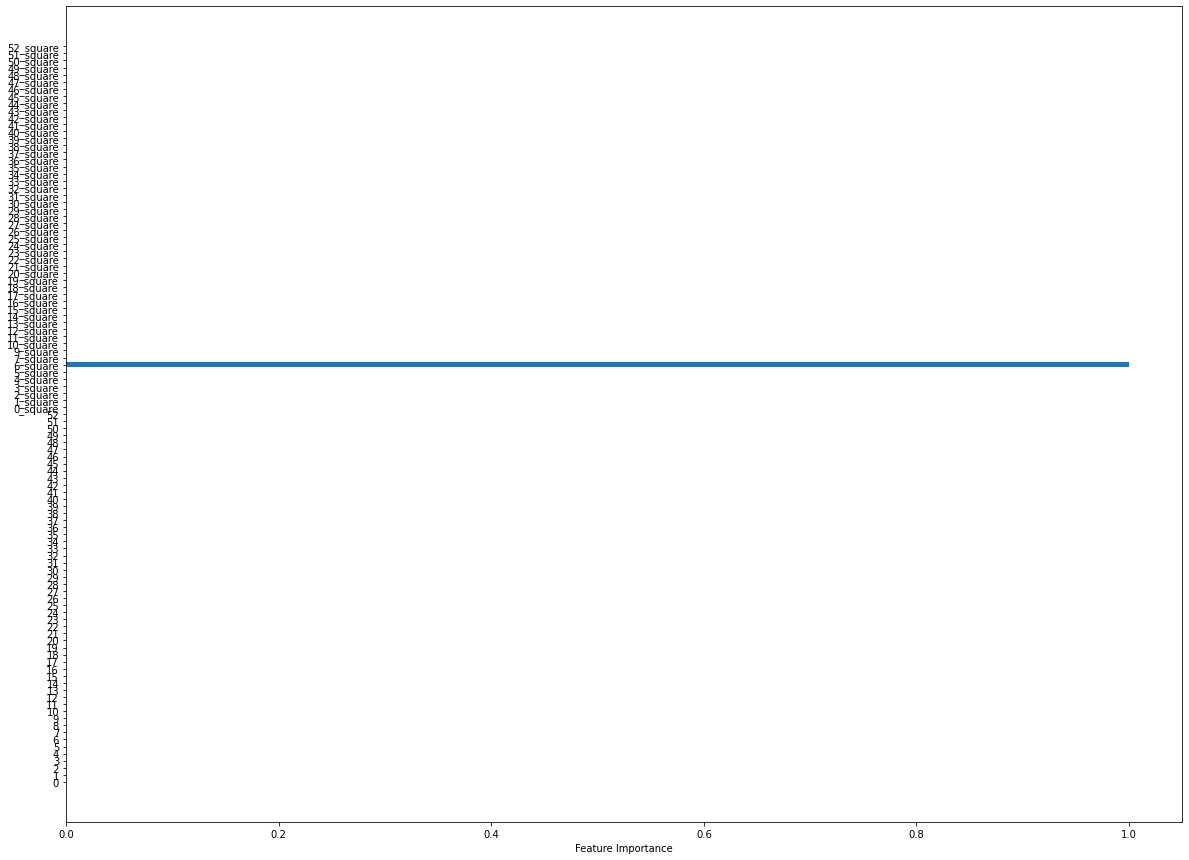

In [51]:
import matplotlib.pyplot as plt
sort = rf.feature_importances_.argsort()
plt.figure(figsize=(20, 15))
plt.barh(X_data.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

Hm, one feature has the biggest importance for model. And its 6_square. Let's look into df of importances, maybe we find another non-zero predictors 

In [52]:
feature_imp_df = pd.DataFrame({'Importance': np.round(rf.feature_importances_, 5)},
                             index=X_data.columns)
feature_imp_df.sort_values(by='Importance', ascending=False)

,Importance
6_square,0.99990
7,0.00005
7_square,0.00005
0,0.00000
15_square,0.00000
...,...
32,0.00000
31,0.00000
30,0.00000
29,0.00000


So our model have influence from only 3 feature. Let's try predict on this 3 features.

### 4.4.2 Three feature Linear Regression

In [53]:
important_predictors = ['6_square', '7', '7_square']

In [54]:
# Train only on 3 important predictors
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data[important_predictors], y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 5)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 5)}")

RMSE scores mean: 0.0
RMSE scores: [0. 0. 0. 0. 0.]


Maybe, we can remove one more feature?

In [55]:
# Try to remove predictors with 7's(because 6_square have impotances 0.99, if delete it model will predict obviously worse)
cols = important_predictors.copy()
for preds in ['7', '7_square']:
    print('Begin with', cols)
    print('Remove: ',preds)
    cols.remove(preds)
    model = LinearRegression()
    rmse_scores = np.array(cross_val_score(model, X_data[cols], y_data, scoring='neg_root_mean_squared_error'))
    print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 10)}")
    print(f"RMSE scores: {np.around(abs(rmse_scores), 10)}")
    print('*'*20)
    print('After Remove cols', cols)
    print('Back cols', preds)
    cols.append(preds)
    print('We have', cols)
    print('-'*10)

Begin with ['6_square', '7', '7_square']
Remove:  7
RMSE scores mean: 0.0007232585
RMSE scores: [0.00072506 0.0007267  0.0007233  0.00072179 0.00071945]
********************
After Remove cols ['6_square', '7_square']
Back cols 7
We have ['6_square', '7_square', '7']
----------
Begin with ['6_square', '7_square', '7']
Remove:  7_square
RMSE scores mean: 0.0
RMSE scores: [0. 0. 0. 0. 0.]
********************
After Remove cols ['6_square', '7']
Back cols 7_square
We have ['6_square', '7', '7_square']
----------


So, according to result, we can remove 7_square feature, because after deleting, RMSE = 0 -> noting change to model

In [56]:
# train on left features 
left_features = ['6_square', '7']
model = LinearRegression()
rmse_scores = np.array(cross_val_score(model, X_data[left_features], y_data, scoring='neg_root_mean_squared_error'))
print(f"RMSE scores mean: {np.around(abs(np.mean(rmse_scores)), 10)}")
print(f"RMSE scores: {np.around(abs(rmse_scores), 10)}")

RMSE scores mean: 0.0
RMSE scores: [0. 0. 0. 0. 0.]


In [57]:
model.fit(X_data[left_features], y_data)

LinearRegression()

In [58]:
coeff = model.coef_

In [59]:
bias = model.intercept_

In [60]:
# Look at dataset with left predictors
dataset_scaling[['6_square', '7', 'target']].head()

,6_square,7,target
0,0.202020,0.107460,0.201055
1,0.616162,0.763720,0.617630
2,0.747475,0.651165,0.746509
3,0.696970,0.424643,0.694242
4,0.666667,0.767310,0.667668


As we can see, 6_square give almost exactly result as a target have.

# 5 Predict Test Values

## 5.1 Upload Test Dataset

In [61]:
dataset_test = pd.read_csv(PATH_TEST)
dataset_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,183,411,239,1.636870,4.316116,3.087304,12.844492,0.054046,0.643383,3.104759,5.579529,7.633182,9.056701,8.621463,4.039640,1.191639,2.775038,9.728365,6.701686,11.456474,3.380898,4.866598,6.705850,2.521471,3.124903,12.787034,7.653819,2.067580,14.527098,13.773822,6.570842,7.280782,9.876851,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,229,420,476,6.256282,0.410825,0.693713,5.895766,7.309578,2.315738,6.204979,4.264013,11.956969,1.801893,13.581027,7.460250,7.883021,10.537323,12.286389,4.499934,3.302528,1.490149,10.010222,2.469233,9.206524,3.097949,14.556454,10.811960,14.584917,2.021892,7.956624,3.006465,10.685368,5.047971,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,448,420,428,5.724503,12.465191,1.977254,7.652835,2.649014,14.531226,1.293337,9.192163,7.218093,9.580598,10.240284,12.522093,11.639480,11.349518,10.959723,12.820784,9.176369,10.157479,4.107533,7.454075,12.178675,9.401233,10.292276,3.530603,12.680169,10.921196,8.008255,14.940933,4.579603,14.150860,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,315,23,421,10.868374,8.335662,3.561422,9.939135,4.885376,7.706857,4.214658,10.346181,2.590524,1.511884,2.357567,5.231946,4.697991,11.870758,0.455004,0.645782,7.849633,5.334536,5.262470,9.251172,9.335831,9.708345,6.091409,6.789830,1.552119,12.569473,7.002166,4.999168,14.278131,0.650444,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,74,481,55,11.871029,10.237341,14.890562,4.589386,12.968020,4.907581,14.461897,13.128528,4.062875,2.253413,12.471074,7.078105,0.843648,14.961904,6.157512,11.370193,12.969449,7.130421,8.974373,6.173560,12.682708,7.864171,2.075725,14.339978,3.365456,6.278199,9.302832,9.715296,14.142186,9.875013,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


For prediction we need only 2 features: **6 and 7**. More precisely, **6_square and 7**. And we can use coeffs and bias for calculating target

In [62]:
# Get 2 our features from test
preds_need = ['6', '7']
test_preds_dataset = dataset_test[preds_need]
test_preds_dataset['6_square'] = np.square(test_preds_dataset['6'])    

# Delete unnessecary column
test_preds_dataset.drop(columns=['6'], inplace=True)
test_preds_dataset.head()

<ipython-input-62-bdd3733f4e91>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preds_dataset['6_square'] = np.square(test_preds_dataset['6'])
/home/diakap/miniconda3/envs/py38/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,7,6_square
0,0.218760,11.0
1,0.700228,79.0
2,0.494556,7.0
3,0.511117,38.0
4,0.756416,64.0


In [63]:
# Get target
test_preds_dataset['PREDICTION'] = coeff[0] * test_preds_dataset['6_square'] + coeff[1] * test_preds_dataset['7'] + bias
test_preds_dataset.head()

<ipython-input-63-0dc81c49d795>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_preds_dataset['PREDICTION'] = coeff[0] * test_preds_dataset['6_square'] + coeff[1] * test_preds_dataset['7'] + bias


,7,6_square,PREDICTION
0,0.218760,11.0,10.892505
1,0.700228,79.0,78.219442
2,0.494556,7.0,6.935138
3,0.511117,38.0,37.626271
4,0.756416,64.0,63.369535


In [66]:
test_preds_dataset.to_csv('data_files/internship_test_PREDICTION.csv', index=False)